In [1]:
import anndata
import h5py
from geosketch import gs
from fbpca import pca
import numpy as np
import pegasus
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", palette="pastel")

In [3]:
# data = h5py.File("test.h5")
# X = data['samp_data']['data'][:,:]
# X.shape

In [4]:
# dataset from 10x genomics
data =  anndata.read_h5ad("V1_Human_Lymph_Node.h5ad")
data

AnnData object with n_obs × n_vars = 3962 × 18467
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Pegasus signature score before sketch

In [5]:
def plot_signatures(data, signature="ribosomal_genes_human"):
    pegasus.calc_signature_score(data, signatures="ribosomal_genes_human")
    data.obs["group"] = 1
    plot = sns.histplot(
        data.obs,
        x="ribo_genes",
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
    )
    return(plot)

2021-10-11 13:59:52,859 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file /Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pegasus/data_files/ribosomal_genes_human.gmt.
2021-10-11 13:59:52,861 - pegasus.tools.signature_score - INFO - Signature ribo_genes: 77 out of 78 genes are used in signature score calculation.
2021-10-11 13:59:52,930 - pegasus.tools.signature_score - INFO - Function 'calc_signature_score' finished in 0.14s.


/Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ribo_genes', ylabel='Count'>

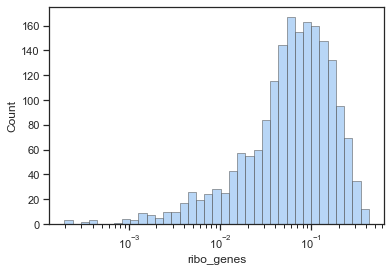

In [6]:
plot_signatures(data)

following geosketch

In [7]:
tX = data.X
U, s, Vt = pca(tX, k=100)
U.shape

(3962, 100)

In [8]:
Vt.shape

(100, 18467)

In [9]:
X_dimred = U[:, :100] * s[:100]
X_dimred

array([[-4.78629734, -0.88088621,  0.5922891 , ...,  0.11393839,
         0.02827281,  1.00203859],
       [ 0.26321176, 10.15465995, -4.76419923, ..., -0.4942985 ,
         0.06001623,  0.36807566],
       [ 6.38117176,  3.29098884, -0.18114548, ...,  0.22443486,
         0.50507715, -0.15412526],
       ...,
       [-1.09989505,  3.17358867,  7.23167089, ..., -1.08637751,
         0.57986889,  1.18216352],
       [-5.51898654,  5.18705964, -6.71666264, ...,  0.36050117,
        -0.89903402,  1.70909189],
       [ 0.11630973,  9.53913956, -5.68257803, ..., -0.44832183,
        -0.69619967,  0.54488849]])

In [13]:
def sketch_plots(data, perc_cells = 10):
    N = int(data.shape[0] * perc_cells/100)
    sketch_index = gs(X_dimred, N, replace=False)
    sdata = data[sketch_index]
    return(plot_signatures(sdata))

2021-10-11 14:10:05,419 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file /Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pegasus/data_files/ribosomal_genes_human.gmt.
2021-10-11 14:10:05,420 - pegasus.tools.signature_score - INFO - Signature ribo_genes: 77 out of 78 genes are used in signature score calculation.
2021-10-11 14:10:05,421 - pegasus.tools.signature_score - WARNING - Signature key ribo_genes exists in data.obs, the existing content will be overwritten!


Trying to set attribute `.obs` of view, copying.


2021-10-11 14:10:05,445 - pegasus.tools.signature_score - INFO - Function 'calc_signature_score' finished in 0.03s.


/Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ribo_genes', ylabel='Count'>

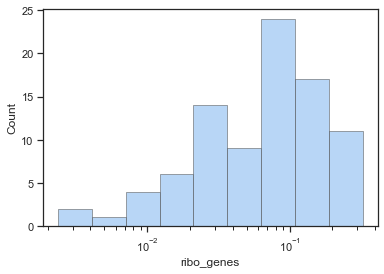

In [16]:
sketch_plots(data, 5)

2021-10-11 14:09:45,110 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file /Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pegasus/data_files/ribosomal_genes_human.gmt.
2021-10-11 14:09:45,112 - pegasus.tools.signature_score - INFO - Signature ribo_genes: 77 out of 78 genes are used in signature score calculation.
2021-10-11 14:09:45,112 - pegasus.tools.signature_score - WARNING - Signature key ribo_genes exists in data.obs, the existing content will be overwritten!


Trying to set attribute `.obs` of view, copying.


2021-10-11 14:09:45,148 - pegasus.tools.signature_score - INFO - Function 'calc_signature_score' finished in 0.04s.


/Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ribo_genes', ylabel='Count'>

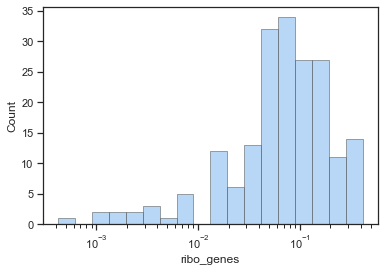

In [14]:
sketch_plots(data, 10)

2021-10-11 14:09:49,637 - pegasus.tools.signature_score - INFO - Loaded signatures from GMT file /Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pegasus/data_files/ribosomal_genes_human.gmt.
2021-10-11 14:09:49,638 - pegasus.tools.signature_score - INFO - Signature ribo_genes: 77 out of 78 genes are used in signature score calculation.
2021-10-11 14:09:49,639 - pegasus.tools.signature_score - WARNING - Signature key ribo_genes exists in data.obs, the existing content will be overwritten!


Trying to set attribute `.obs` of view, copying.


2021-10-11 14:09:49,685 - pegasus.tools.signature_score - INFO - Function 'calc_signature_score' finished in 0.05s.


/Users/kancherj/opt/miniconda3/envs/sketch/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ribo_genes', ylabel='Count'>

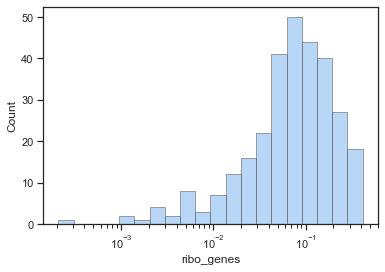

In [15]:
sketch_plots(data, 15)